## Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Task 2: To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
#Libraries to analyse the data
import pandas as pd
import numpy as np
#Library to pre-process the data for training the model
from sklearn.model_selection import train_test_split
#Importing model
from sklearn.linear_model import LinearRegression
#Libraries to check accuracy of your model
from math import sqrt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Library to visualise the data
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading and Displaying the dataset
df=pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


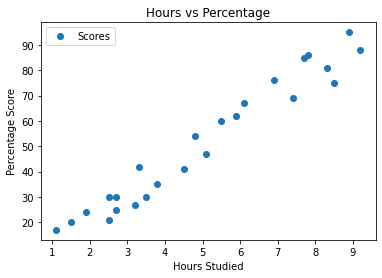

In [3]:
# Visualising the data using matplotlib
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above graph we can clearly see that score and hours have a positive linear relation**

In the next step, we will divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X= df.drop(columns = ['Scores'])#X will store values of attributes(i.e. hours)
Y= df['Scores']#Y will store values of labels(i.e Scores) 
X = np.array(X)#creating a numpy array using the attributes
Y = np.array(Y)#creating a numpy array using the labels
Y=Y.reshape(-1,1)#reshaping the label array 
#reshaping is done to fit the data into the model

In [5]:
#Preparing the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)#splitting dataset into testing data and training data
#75% for training and 25% for testing

In [6]:
#Training the Model
LR = LinearRegression()#creating a Linear Regression Model
LR.fit(X_train, Y_train)#Fitting the model with training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
Y_pred = LR.predict(X_test)#Predicting the Test results from the model
Y_pred

array([[54.84403377],
       [75.5209495 ],
       [85.40990919],
       [27.8741437 ],
       [22.48016568],
       [29.67213637],
       [74.62195316]])

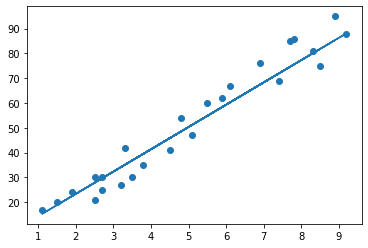

In [8]:
# Plotting the regression line
line = LR.coef_*X+LR.intercept_
# Plotting for the entire dataset
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

## Making Pridictions
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
# Comparing Actual vs Predicted
df_i = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})  
df_i

,Actual,Predicted
0,60,54.844034
1,86,75.520949
2,95,85.409909
3,21,27.874144
4,24,22.480166
5,25,29.672136
6,85,74.621953


In [10]:
# You can also test with your own data
hours = [[7.6]]
own_pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[7.6]]
Predicted Score = [73.72295683]


# Evaluating the model
The final step is to evaluate the performance of algorithm. 

Evaluating the model helps us to find how well did the algorithm have performed on the given dataset. Evaluation also helps us to compare different models. For simplicity here, we have chosen the mean square error. There are many such metrics available for evaluation of a model.

In [11]:
k = X_test.shape[1]
n = len(X_test)
n
RMSE = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '3f'))
MSE = mean_squared_error(Y_test, Y_pred)
MAE = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [12]:
print('Root Mean Squared Error -',RMSE, '\nMean Squared Error -',MSE, '\nMean Absolute Error -',MAE, '\nR2 Score -',r2, '\nAdjusted R2 -',adj_r2)

Root Mean Squared Error - 7.629462 
Mean Squared Error - 58.20868446005505 
Mean Absolute Error - 6.952752679851611 
R2 Score - 0.9371756489307775 
Adjusted R2 - 0.9246107787169331
